# Algoritmo de Optimización por Enjambre de Partículas (PSO)

---

<ul>
    <li><strong>Autor:</strong> Jesús Emmanuel Solís Pérez </li>
    <li><strong>Contacto:</strong> <a href="mailto:jsolisp@unam.mx">jsolisp@unam.mx</a>
</ul>

---

# Propósito
El objetivo de este cuaderno es mostrar los fundamentos matemáticos para PSO.

# Preliminares

PSO utiliza un conjunto de soluciones candidatas que se comportan como partículas dentro de un espacio llamado **espacio de soluciones**.  El movimiento de las partículas es determinado por su velocidad. Dicha velocidad depende de la posición de la mejor solución que ha encontrado cada una de las partículas y de la mejor solución encontrada globalmente por el enjambre.

Suponga que se tiene el siguiente problema de optiminización

\begin{equation}
 \min \left\{ x_{1}^{2}\left( 4 - 21x_{1}^{2} + \frac{x_{1}^{4}}{3} \right) + x_{1}x_{2} + x_{2}^{2}\left(-4 + 4x_{2}^{2} \right) \right\}, 
\end{equation}

s. a.

\begin{equation}
 x_{1},x_{2} \in (-10,10).
\end{equation}

## Algoritmo de PSO

En este algoritmo, soluciones al problema de optimización llamadas partículas “evolucionan” por cooperación y competencia entre ellos mismos para representar una solución al problema de optimización. En este método, cada partícula ajusta su vuelo de acuerdo a su experiencia de vuelo y la experiencia de vuelo de la población.

En PSO, representamos cada partícula como $X_{I}=(x_{i1},x_{i2},\dots,x_{iD})$, donde $D$ representa el espacio de dimensión $D$. Además, la mejor posición de la partícula se denota como $P_{I}=(p_{i1},p_{12},\dots,p_{iD})$ y es conocida como **pbest**. Por lo tanto, mejor partícula de la población es representada por $g$ y llamada **gbest**.

Como se ha mencionado con anterioridad, las partículas cambian su velocidad de acuerdo con la mejor posición local $p_{k}^{i}$ y la mejor posición global $p^{g}_{k}$. Esto se expresa mediante la siguiente ecuación

\begin{equation}
 \label{ecVelocidad}
 v_{k+1}^{i} \leftarrow w \cdot v_{k}^{i} + c_{1} \cdot R_1 \cdot (p_{k}^{i}-x_{k}^{i}) + c_{2} \cdot R_2 \cdot (p_{k}^{g}-x_{k}^{i}),
\end{equation}

donde $w$ es el coeficiente que regula la **inercia** de la partícula, $c_{1}$ regula el aspecto cognitivo de la partícula, $c_{2}$ regula la influencia del aspecto social sobre la partícula y $R_{1}, R_{2}$ son dos números aleatorios calculados mediante $U(0,1)$. Por lo tanto, la nueva posición de la partícula depende de la posición actual así como de su velocidad

\begin{equation}
 \label{ecPosicion}
 x_{k+1}^{i} \leftarrow x_{k}^{i} + v_{k+1}^{i}.
\end{equation}

Por consiguiente, podemos resumir PSO en los siguientes pasos:

1. Definir los parámetros del algoritmo:  tamaño del enjambre $n_p$, factor de inercia $w$, factores cognitivo $c_1$ y social $c_2$, dimensión del problema $\mathcal{D}$.
2. Inicializar las $n_p$ partículas con posición y velocidad aleatoria dentro del espacio de búsqueda de dimensión $\mathcal{D}$ y evaluar la población inicial para determinar la mejor posición local $pbest$ y la mejor posición global $gbest$.
3. Incrementar el número de iteraciones $k$.  Aquí cada partícula actualiza su posición y velocidad de acuerdo a las ecuaciones (\ref{ecVelocidad}) y (\ref{ecPosicion}) para evaluar el valor correspondiente al problema de optimización definido como $\varphi_k^i = \varphi(x_k^i)$. Además, se realizan las siguientes evaluaciones:
 \begin{itemize}
  \item si $\varphi_k^i \leq pbest_k^i$, entonces $pbest_k^i=\varphi_k^i$ y $p_k^i=x_k^i$.
  \item si $\varphi_k^i \leq gbest_k$, entonces $gbest_k^i=\varphi_k^i$ y $p_k^g=x_k^i$.
 \end{itemize}
4. Si el criterio de terminación se satisface, el algoritmo termina con la solución $x^* = arg\min_{x_k^i}\left\{f(x_k^i,)\forall i,k \right\}$ de lo contrario se regresa al paso 3.

**Nota.** En la práctica, se suele elegir $c_{1} = c_{2} = 1.494$ y $w = 0.5 + \text{rand}/2$.


# Setup

## Library import
We import all the required Python libraries

In [8]:
# Data manipulation
import numpy as np

from multiprocessing import Process
from time import process_time
from ypstruct import structure

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "serif"
plt.rc('axes', titlesize=20)        # Controls Axes Title
plt.rc('axes', labelsize=20)        # Controls Axes Labels
plt.rc('xtick', labelsize=20)       # Controls x Tick Labels
plt.rc('ytick', labelsize=20)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title
%matplotlib inline

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

# Definición de funciones
Definimos todas las funciones que comprenden el método de PSO.

In [5]:
class particle_swarm:
    def __init__(self,optimizacion,parametros):
        # Información del problema
        self.CostFunction = optimizacion.CostFunction
        self.Lb = np.asarray(optimizacion.Lb)
        self.Ub = np.asarray(optimizacion.Ub)
        self.dim = optimizacion.dim
        
        ## Parámetros PSO
        self.swarm_size = parametros.swarm_size
        self.bird_step = parametros.bird_step
        self.c1 = parametros.c1
        self.c2 = parametros.c2
        self.w = parametros.w
        self.vIni = parametros.vIni
        
    def bounds_pso(self,s):
        ns_tmp = s
        
        # Aplicando el límite inferior
        ns_tmp = np.fmax(ns_tmp, self.Lb)
        
        # Aplicando el límite superior
        ns_tmp = np.fmin(ns_tmp, self.Ub)
        
        return ns_tmp
        
    def search(self):
        # Inicialización de parámetros
        R1 = np.random.rand(self.swarm_size,self.dim)
        R2 = np.random.rand(self.swarm_size,self.dim)
        
        current = structure(position = None, fitness = None).repeat(self.swarm_size)
        
        # Soluciones aleatorias iniciales
        for i in range(self.swarm_size):
            current[i].position = self.Lb + (self.Ub - self.Lb)*np.random.rand(len(self.Lb))
            
        velocity = self.vIni*np.random.randn(self.swarm_size,self.dim)
        local_best = current
        
        # Evalua la posición inicial
        for i in range(self.swarm_size):
            current[i].position = self.bounds_pso(current[i].position)
            current[i].fitness = self.CostFunction(current[i].position)
            
        local_best  = current
        global_best = sorted(local_best, key=lambda x: x.fitness)
        global_best = global_best[0:self.swarm_size]
        
        for i in range(self.swarm_size):
            global_best[i] = global_best[0]
        
        # Actualización de la velocidad
        for i in range(self.swarm_size):
            velocity[i,:] = self.w*velocity[i,:] + self.c1*(R1[i,:]*(local_best[i].position-current[i].position)) + self.c2*(R2[i,:]*(global_best[i].position-current[i].position))
            
        # Actualización de las partículas
        for i in range(self.swarm_size):
            current[i].position += velocity[i,:]
            
        # Evalua nuevas partículas
        
        ## Ciclo principal PSO
        iter = 0
        while (iter<self.bird_step):
            for i in range(self.swarm_size):
                current[i].position = self.bounds_pso(current[i].position)
                current[i].fitness = self.CostFunction(current[i].position)
                
            for i in range(self.swarm_size):
                if current[i].fitness < local_best[i].fitness:
                    local_best[i] = current[i]
                    
            local_best  = current
            global_best = sorted(local_best, key=lambda x: x.fitness)
            global_best = global_best[0:self.swarm_size]
            
            for i in range(self.swarm_size):
                global_best[i] = global_best[0]
            
            # Actualización de la velocidad
            for i in range(self.swarm_size):
                velocity[i,:] = self.w*velocity[i,:] + self.c1*(R1[i,:]*(local_best[i].position-current[i].position)) + self.c2*(R2[i,:]*(global_best[i].position-current[i].position))
                
            # Actualización de las partículas
            for i in range(self.swarm_size):
                current[i].position += velocity[i,:]
                
            iter += 1
        
        current = sorted(current, key=lambda x: x.fitness)
        current = current[0:self.swarm_size]
        
        self.bestsol = current[0].position
        self.fmin = current[0].fitness

# Caso I. Función Booth
La función Booth está definida por

\begin{equation}
 f\left(x_{1} , x_{2}\right) = \left(x_{1} + 2x_{2} − 7\right)^{2} + \left(2x_{1} + x_{2} − 5\right)^{2}.
\end{equation}

Utilice el método de PSO para minimizar la función de Booth considerando que el espacio de búsqueda está dado por $x_{i} \in [-10,10] \forall i=1,2$.

In [15]:
def Booth(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

In [16]:
# Definición del problema de optimización
optimizacion = structure()
optimizacion.CostFunction = Booth # Función a minimizar
optimizacion.dim = 2 # Número de variables
optimizacion.Lb = [-10, -10] # Valores mínimos
optimizacion.Ub = [ 10,  10] # Valores máximo

# Parámetros de PSO
parametros = structure()
parametros.swarm_size = 50 # Tamaño de la población de soluciones
parametros.bird_step = 100 # Numero máximo de iteraciones
parametros.c1 = 1.494 # PSO parámetro C1, parámetro cognitivo
parametros.c2 = 1.494 # PSO parámetro C1, parámetro social
parametros.w = 0.5 + np.random.rand()/2 # Momento o peso inercial del PSO
parametros.vIni = 0.1

# Start the stopwatch / counter 
t1_start = process_time() 

PSO = particle_swarm(optimizacion, parametros)
PSO.search()
print(PSO.bestsol)

# Stop the stopwatch / counter
t1_stop = process_time()

print("Elapsed time during the whole program in seconds:",t1_stop-t1_start)

[1. 3.]
Elapsed time during the whole program in seconds: 1.2179178460000006


## Graficación de resultados

In [18]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)

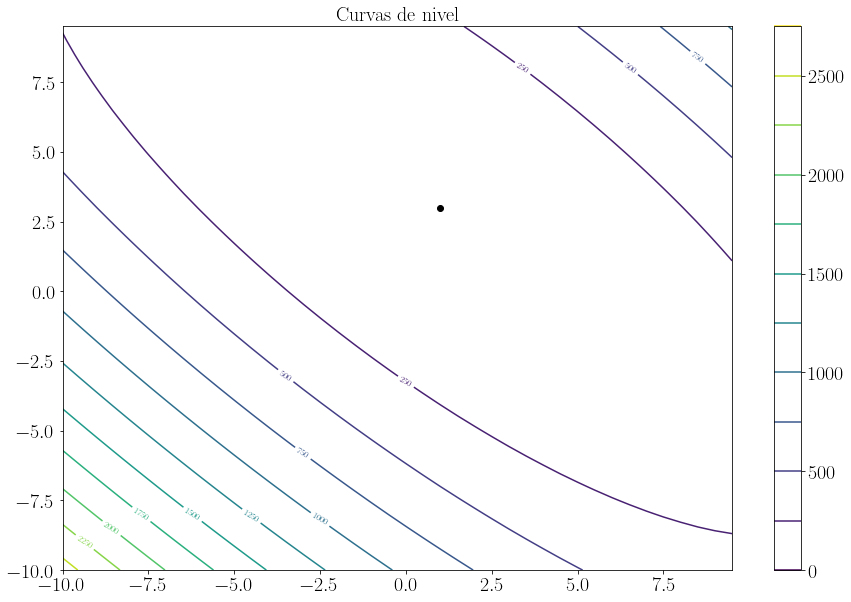

In [19]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, Booth([X,Y]), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(PSO.bestsol[0], PSO.bestsol[1],'o--k')
plt.title('Curvas de nivel')
plt.show()

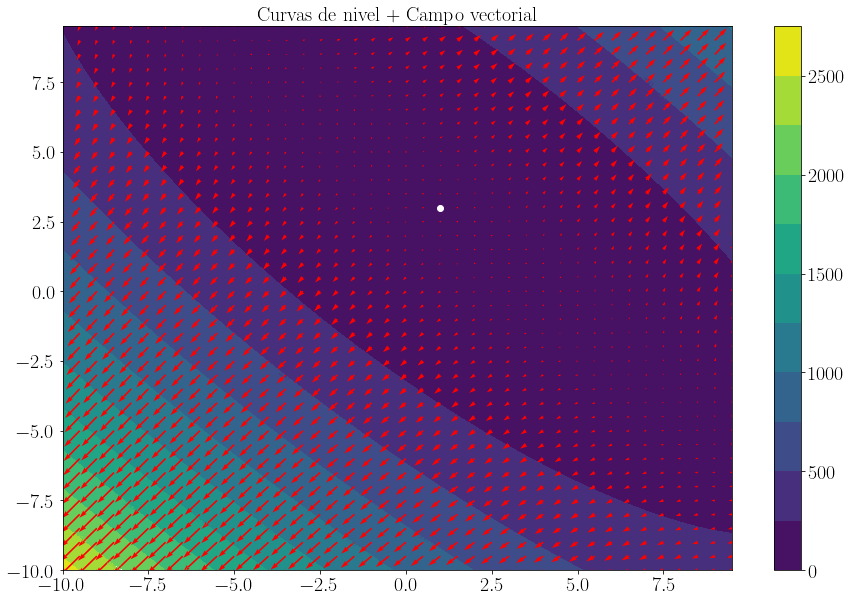

In [20]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(Booth([X,Y]),dx)
contours = plt.contourf(X,Y,Booth([X,Y]), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(PSO.bestsol[0], PSO.bestsol[1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

# Caso II. Función de Matyas
La función de Matyas está definida por

\begin{equation}
 f\left(x_{1},x_{2}\right) = 0.26\left(x_{1}^{2} + x_{2}^{2}\right)- 0.48x_{1}x_{2}.
\end{equation}

Utilice el método de PSO para minimizar la función de Matyas considerando que el espacio de búsqueda está dado por $x_{i} \in [-10,10] \forall i=1,2$. 

In [10]:
def Matyas(x):
    return 0.26*(x[0]**2+x[1]**2)-0.48*x[0]*x[1]

In [11]:
# Definición del problema de optimización
optimizacion = structure()
optimizacion.CostFunction = Matyas # Función a minimizar
optimizacion.dim = 2 # Número de variables
optimizacion.Lb = [-10, -10] # Valores mínimos
optimizacion.Ub = [ 10,  10] # Valores máximo

# Parámetros de PSO
parametros = structure()
parametros.swarm_size = 50 # Tamaño de la población de soluciones
parametros.bird_step = 100 # Numero máximo de iteraciones
parametros.c1 = 1.494 # PSO parámetro C1, parámetro cognitivo
parametros.c2 = 1.494 # PSO parámetro C1, parámetro social
parametros.w = 0.5 + np.random.rand()/2 # Momento o peso inercial del PSO
parametros.vIni = 0.1

# Start the stopwatch / counter 
t1_start = process_time() 

PSO = particle_swarm(optimizacion, parametros)
PSO.search()
print(PSO.bestsol)

# Stop the stopwatch / counter
t1_stop = process_time()

print("Elapsed time during the whole program in seconds:",t1_stop-t1_start)

[ 0.35537093 -0.41863972]
Elapsed time during the whole program in seconds: 1.2046569830000005


##  Graficación de resultados


In [22]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)

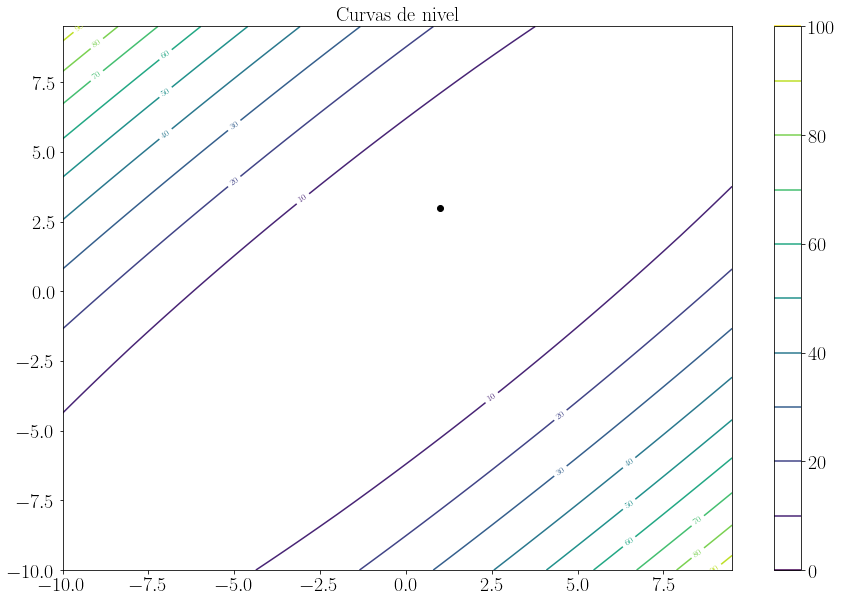

In [23]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, Matyas([X,Y]), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(PSO.bestsol[0], PSO.bestsol[1],'o--k')
plt.title('Curvas de nivel')
plt.show()

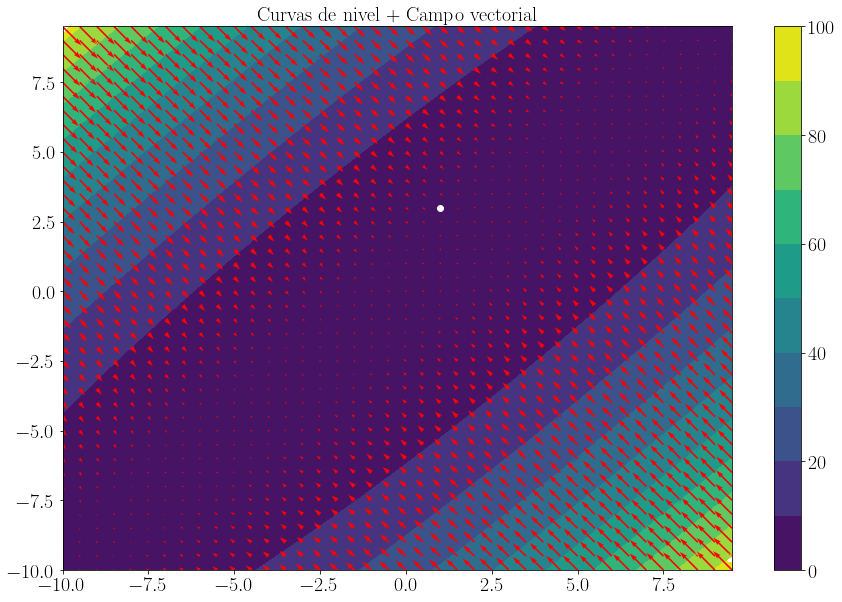

In [24]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(Matyas([X,Y]),dx)
contours = plt.contourf(X,Y,Matyas([X,Y]), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(PSO.bestsol[0], PSO.bestsol[1], 'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

# Caso III. Función de Beale
La función de Beale está definida por

\begin{equation}
 f\left(x_{1},x_{2}\right) = \left(1.5 - x_{1} + x_{1}x_{2}\right)^{2} + \left(2.25 - x_{1} + x_{1}x_{2}^{2}\right)^{2} + \left(2.62 - x_{1} + x_{1}x_{2}^{3}\right)^{2}.
\end{equation}

Utilice el método de PSO para minimizar la función de Beale considerando que el espacio de búsqueda está dado por $x_{i} \in [-4.5,4.5] \forall i=1,2$. 

In [12]:
def Beale(x):
    return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.62 - x[0] + x[0]*x[1]**3)**2

In [14]:
# Definición del problema de optimización
optimizacion = structure()
optimizacion.CostFunction = Beale # Función a minimizar
optimizacion.dim = 2 # Número de variables
optimizacion.Lb = [-4.5, -4.5] # Valores mínimos
optimizacion.Ub = [ 4.5, 4.5] # Valores máximo

# Parámetros de PSO
parametros = structure()
parametros.swarm_size = 50 # Tamaño de la población de soluciones
parametros.bird_step = 100 # Numero máximo de iteraciones
parametros.c1 = 1.494 # PSO parámetro C1, parámetro cognitivo
parametros.c2 = 1.494 # PSO parámetro C1, parámetro social
parametros.w = 0.5 + np.random.rand()/2 # Momento o peso inercial del PSO
parametros.vIni = 0.1

# Start the stopwatch / counter 
t1_start = process_time() 

PSO = particle_swarm(optimizacion, parametros)
PSO.search()
print(PSO.bestsol)

# Stop the stopwatch / counter
t1_stop = process_time()

print("Elapsed time during the whole program in seconds:",t1_stop-t1_start)

[2.9901371  0.49803263]
Elapsed time during the whole program in seconds: 1.1916130020000004


## Graficación de resultados

In [27]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)

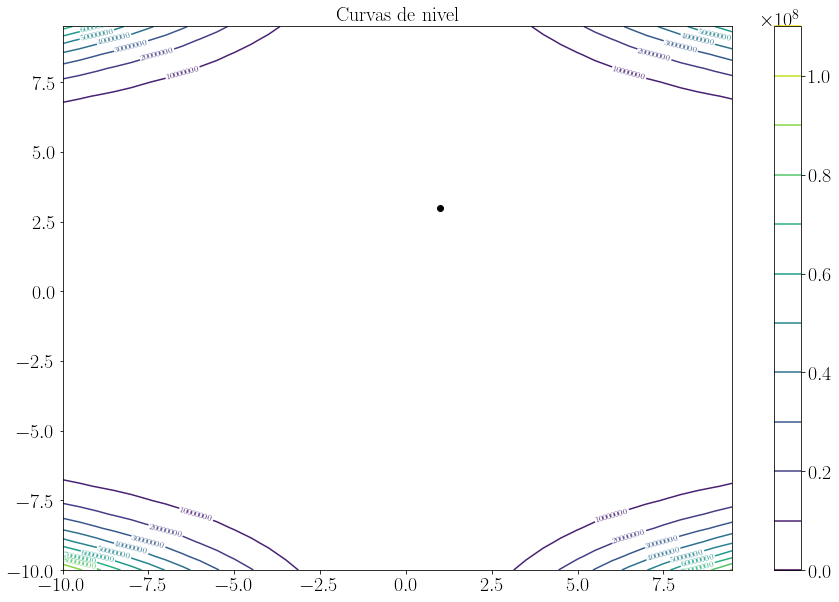

In [29]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, Beale([X,Y]), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(PSO.bestsol[0], PSO.bestsol[1],'o--k')
plt.title('Curvas de nivel')
plt.show()

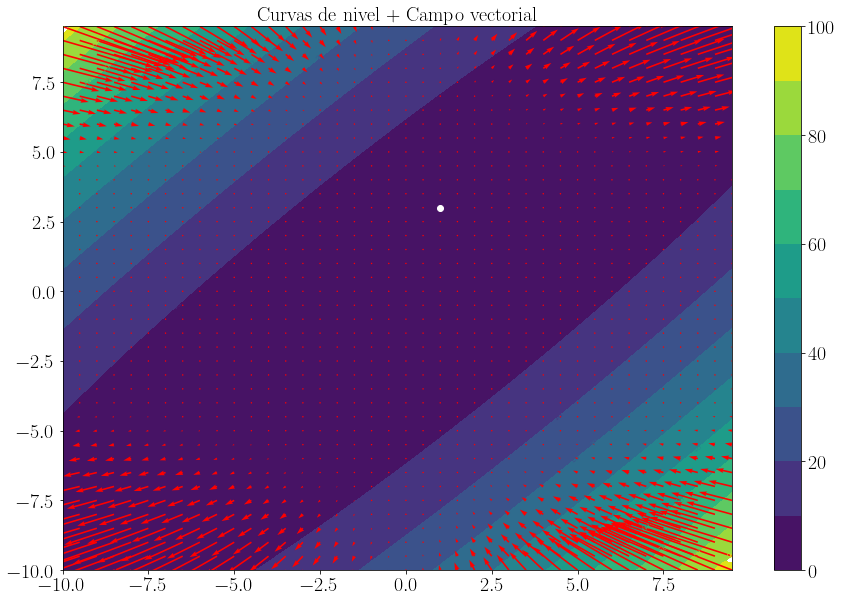

In [30]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(Beale([X,Y]),dx)
contours = plt.contourf(X,Y,Matyas([X,Y]), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(PSO.bestsol[0], PSO.bestsol[1], 'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()